DATA LOADING

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("Titanic-Dataset.csv")
print(dataset.info())
dataset.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#check the duplicate values
print('duplicate value is ',dataset.duplicated().sum())
#check null 
print(dataset.isnull().sum())

duplicate value is  0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


DATA VISUALIZATION

<Axes: xlabel='Sex', ylabel='Survived'>

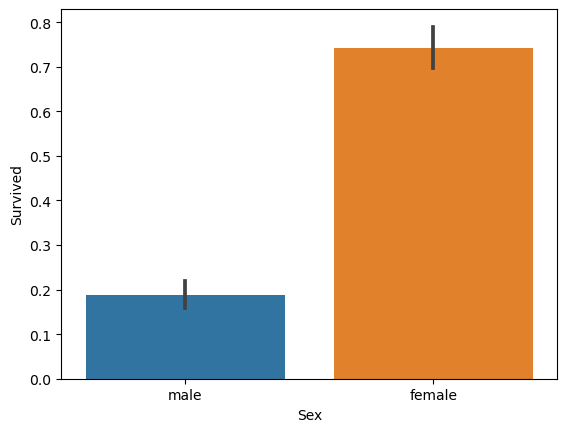

In [5]:
sns.barplot(x='Sex', y='Survived', data=dataset)

C:\Users\amaan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


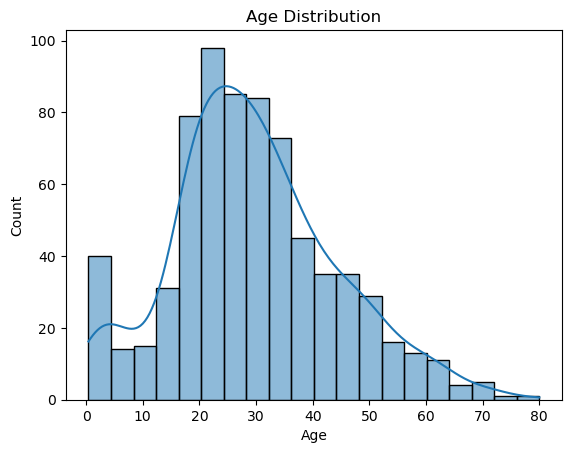

In [6]:
sns.histplot(dataset['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

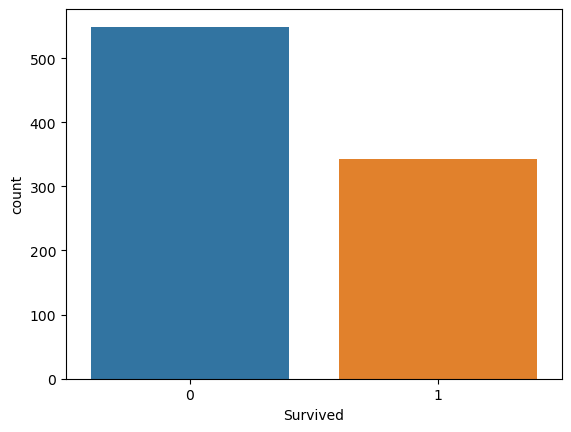

In [7]:
sns.countplot(x ='Survived',data = dataset)

In [8]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


DATA PREPROCESSING

In [9]:
fill_age = dataset['Age'].median()
dataset['Age'].fillna(fill_age,inplace = True)
dataset['Family'] = dataset['Parch'] + dataset['SibSp']
dataset.drop(columns = ['Name','Cabin','Ticket','Embarked','SibSp','Parch'], inplace = True, axis =1)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family
0,1,0,3,male,22.0,7.2500,1
1,2,1,1,female,38.0,71.2833,1
2,3,1,3,female,26.0,7.9250,0
3,4,1,1,female,35.0,53.1000,1
4,5,0,3,male,35.0,8.0500,0


In [10]:
from sklearn.preprocessing import LabelEncoder
lb =LabelEncoder()
dataset['Sex'] = lb.fit_transform(dataset['Sex'])
dataset['Survive']=dataset['Survived']
dataset.drop(columns = ['Survived'] , inplace  = True)
x = dataset.iloc[:,:-1]
y = dataset['Survive']

SPLITING AND SCALING

In [11]:
#train the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 45)

In [12]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)


In [13]:
x_train = pd.DataFrame(x_train)
x_train.head(11)

,0,1,2,3,4,5
0,-0.456760,-1.532879,0.735612,0.655795,2.320077,0.055432
1,-0.654552,0.842333,0.735612,-0.120045,-0.483321,-0.561246
2,-1.174242,0.842333,-1.359412,-1.594141,0.027284,1.905466
3,-1.701688,-1.532879,-1.359412,2.207475,-0.123371,-0.561246
4,-0.173646,-0.345273,0.735612,0.345459,-0.230225,0.055432
5,1.342762,-1.532879,-1.359412,1.509219,-0.135323,-0.561246
6,0.233574,0.842333,0.735612,-0.042461,-0.485328,-0.561246
7,1.567702,-0.345273,-1.359412,1.121299,-0.133960,0.055432
8,-0.763144,0.842333,0.735612,0.035123,-0.324565,0.055432
9,0.788168,0.842333,-1.359412,-0.120045,-0.483803,-0.561246


In [14]:
x_test = pd.DataFrame(x_test)
x_test.head(10)

,0,1,2,3,4,5
0,-0.701459,-1.712884,0.746004,0.622105,0.595690,0.709006
1,-0.902426,0.769758,0.746004,0.993418,-0.530740,0.074446
2,-1.154620,-0.471563,-1.340476,0.028004,-0.081806,0.074446
3,-1.012761,0.769758,0.746004,-0.046259,0.696255,-0.560115
4,1.221521,0.769758,-1.340476,1.438994,0.131871,1.978127
5,-1.024583,-1.712884,-1.340476,-0.046259,0.658092,0.074446
6,-0.693578,0.769758,0.746004,-0.046259,-0.560188,-0.560115
7,1.154532,0.769758,0.746004,0.325055,-0.546793,-0.560115
8,0.697430,0.769758,0.746004,1.141944,-0.539777,-0.560115
9,0.177280,0.769758,0.746004,0.696368,-0.524150,-0.560115


TRAIN THE MODEL

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
x_pred_train = lr.predict(x_train)
x_pred_test  = lr.predict(x_test)
train_accuracy = accuracy_score(y_train, x_pred_train)
test_accuracy = accuracy_score(y_test, x_pred_test)
print(train_accuracy*100, test_accuracy*100)

78.79213483146067 82.68156424581005


In [16]:
print(x_pred_train)

[0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 

In [17]:
new_data = np.array([[1.628391, -0.400551, -1.380624, 0.984386, -0.377145, -0.554666]])
lr_prediction = lr.predict(new_data)
print(lr_prediction[0])  

1


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt.fit(x_train,y_train)
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_test_pred)*100)
print(accuracy_score(y_train, y_train_pred)*100)

85.47486033519553
81.32022471910112


In [19]:
print(y_train_pred)

[0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 1 0 0 0 0 

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       117
           1       0.79      0.79      0.79        62

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

[[104  13]
 [ 13  49]]


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


Cross-Validation Scores: [0.83916084 0.8041958  0.76760563 0.73943662 0.8028169 ]


In [23]:
import pickle
import joblib

# Create a dictionary to store all components
data_to_save = {
    'dataset': dataset,
    'logistic_regression_model': lr,
    'decision_tree_model': dt,
    'standard_scaler': ss,
    'label_encoder': lb
}

# Save the dictionary into one pkl file
with open('titanic_project.pkl', 'wb'):
    pickle.dump(data_to_save)


TypeError: dump() missing required argument 'file' (pos 2)